In [1]:
import pandas
from matplotlib import pyplot as plt

In [2]:
df = pandas.read_csv('girg.csv', sep=',')
df['gap'] = df.upper - df.lower
df.head()

,type,n,deg,ple,T,d,s1,s2,s3,rep,...,root_size,root_gap,root_time,lower,upper,solved,opt,adds,dels,gap
0,n,100,10,2.9,0.0,2,12951353,613351,90192581,0,...,1,0,1228,256,259,1,259,27,232,3
1,n,100,10,2.9,0.0,2,12951464,613462,90192692,1,...,1,0,1523,293,297,1,297,23,274,4
2,n,100,10,2.9,0.0,2,12951572,613570,90192800,2,...,1,0,1095,299,301,1,301,37,264,2
3,n,100,10,2.9,0.0,2,12951681,613679,90192909,3,...,88,8,6484,323,331,1,331,24,307,8
4,n,100,10,2.9,0.0,2,12951787,613785,90193015,4,...,87,12,10684,332,344,1,344,20,324,12


In [3]:
df[(df.root_size==1) & (df['type']=='n')]

df[df['type']=='n']

data = df[(df.solved==1) & (df['type']=='n')]
(data.dels / (5*data.n)).describe()

count    104.000000
mean       0.552422
std        0.036829
min        0.442857
25%        0.529327
50%        0.551146
75%        0.576717
max        0.648000
dtype: float64

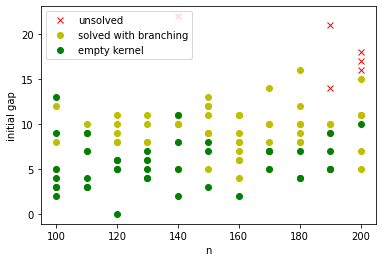

In [4]:
du = df[df['type']=='n']
du[du.solved==0].plot(x='n', y='gap', style='rx', label='unsolved')
du[du.solved & (du['root_size']>1)].plot(x='n', y='gap', style='yo', ax=plt.gca(), label='solved with branching')
du[du.solved & (du['root_size']==1)].plot(x='n', y='gap', style='go', ax=plt.gca(), label='empty kernel')
plt.ylabel('initial gap')
plt.savefig('plots/girg-gap.pdf', bbox_inches='tight')

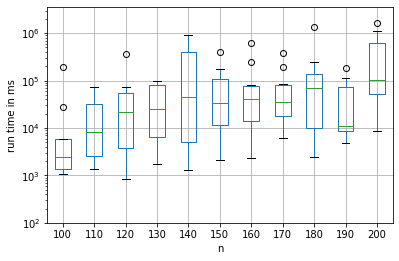

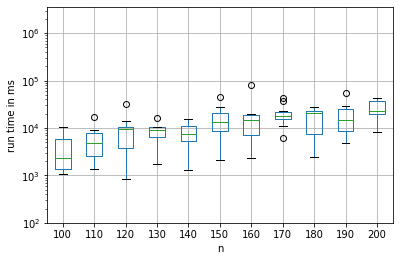

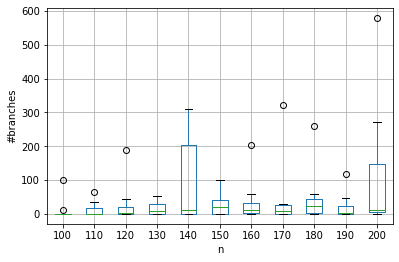

In [6]:
ds = du[du.solved==1]
for col in ['time', 'root_time']:
    data = ds if col=='time' else du
    data.boxplot(by='n', column=col)
    #plt.gcf().set_size_inches(8,4)
    plt.semilogy()
    plt.ylim(bottom=100, top=1000*60*60)
    plt.suptitle(None)
    plt.title(None)
    plt.ylabel('run time in ms')
    plt.savefig(f'plots/girg-{col}.pdf', bbox_inches='tight')
    

ds.boxplot(by='n', column='branches')
#plt.gcf().set_size_inches(8,4)
plt.suptitle(None)
plt.title(None)
plt.ylabel('#branches')
#plt.semilogy()
plt.savefig(f'plots/girg-branches.pdf', bbox_inches='tight')   

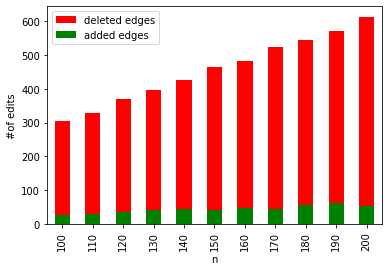

In [30]:
dg = ds.groupby('n').sum()
((dg.dels+dg.adds)/dg.solved).plot.bar(color='r', label='deleted edges')
(dg.adds/dg.solved).plot.bar(color='g', label='added edges')
plt.xlabel('n')
plt.ylabel('#of edits')
plt.legend()
plt.savefig(f'plots/girg-edits.pdf', bbox_inches='tight') 

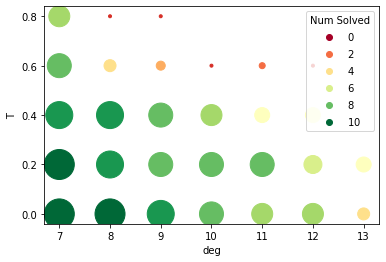

In [133]:
data = df[df.type=='grid'].groupby(['deg','T'])
scatter = plt.scatter(x=data.deg.first(), y=data.T.first(), s=(data.solved.sum()*3)**2, c=data.solved.sum(), cmap='RdYlGn', vmin=0, vmax=10)

plt.xlabel('deg')
plt.ylabel('T')
plt.yticks(data.T.first().unique())

plt.legend(*scatter.legend_elements(prop="colors", num=6), loc="upper right", title="Num Solved")

plt.savefig(f'plots/girg-threshold.pdf', bbox_inches='tight')